all exercise based on [Introduction to Deep Learning for NLP](https://wikidocs.net/32105)

## 전처리 (Preprocessing)

**Tokenizer()**
- 토큰화와 정수 인코딩(단어에 대한 인덱싱)을 위해 사용됨.

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer()
fit_text = 'The earth is an awesome place live'
t.fit_on_texts([fit_text])
# 여기에 list가 아닌 그냥 문자열이 들어가면 각 letter 단위로 인코딩 됨.
# 인자로 str 리스트, str 리스트의 리스트 등이 들어갈 수 있음

test_text = 'The earth is an great place live'
sequences = t.texts_to_sequences([test_text])[0] # argument로는 list of string이 들어가야 함. 각 text를 sequence of numbers로 바꿔줘

print("sequences : ", sequences)
print("word_index : ",t.word_index)

sequences :  [1, 2, 3, 4, 6, 7]
word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


**pad_sequence**: 샘플의 길이를 맞추기 위한 작업. 자연어처리에서는 'padding' 작업이라고 함. 보통 숫자 0을 넣어서 맞춰줌. 넘치면 자르고


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1,2,3],[3,4,5,6],[7,8]], maxlen = 3, padding = 'pre')
# 첫번째 인자: 패딩을 진행할 데이터.
# maxlen: 정규화할 길이
# padding: 'pre'는 앞쪽으로 0 채움, 'post'는 뒤쪽으로 0 채움

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

## Word Embedding

* 원-핫 벡터: 희소 벡터, 수동, 값: 1&0 --> **원핫 인코딩**
* 임베딩 벡터: 밀집 벡터, 훈련 데이터로부터 학습, 값: 실수 --> **워드 임베딩**

**Embedding()**: 단어를 밀집 벡터로 만드는 역할 (임베딩 층을 만드는 역할)<br>
Embedding(number of samples, input_length) 2차원 정수 텐서 입력으로 받아,(이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스)

(number of samples, input_length, embedding word dimensionality) 3차원 텐서 리턴

<br>
Embedding(첫번째 인자: 단어 집합의 크기(총 단어 개수), 두번째 인자: 임베딩 벡터의 출력 차원(결과로 나오는 임베딩 벡터 크기), input_length = 입력 시퀀스 길이)

## Modeling

**Sequential()**: 인공신경망 층을 구성하기 위한 객체<br>
`.add()`로 층을 단계적으로 추가

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(층)
model.add(층)
model.add(층)

In [ ]:
# 예시
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(vocabulary, output_dim, input_length))

**Dense()**: 전결합층(fully-connected layer). model.add()로 추가할 수 있음

- 첫번째 인자: 출력 뉴런 수
- input_dim: 입력 뉴런 수(입력의 차원)
- activation: 활성화함수
    - linear: 디폴트. 입력 뉴런과 가중치 계산 결과 그대로 출력.
    - sigmoid: 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화함수
    - softmax: 소프트맥스 함수. 셋 이상 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화함수
    - relu: 렐루 함수. 은닉층에 주로 사용되는 활성화 함수

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1,input_dim = 3, activation = 'relu'))

In [4]:
model2 = Sequential()
model2.add(Dense(8, input_dim = 4, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid')) # input_dim 인자가 없음. 이전 층의 뉴런 수가 8개라는 것이 정해져있기 때문에.

**summary()**: 모델의 정보 요약

In [6]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


## Compile과 Training

**compile()**: 모델을 기계가 이해할 수 있도록 컴파일. 오차함수, 최적화 방법, 메트릭 함수 선택 가능

In [7]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense # 인공신경망 층의 종류s
from tensorflow.keras.models import Sequential
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics= ['acc'])

**fit()**: 모델을 학습함. '학습', '훈련', '적합' 등이라고 부름. 모델이 데이터에 적합해가는 과정.
- 첫번째 인자 훈련데이터
- 두번째 인자: 지도학습에서의 label 데이터
- epochs: 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미. 정수값 기재해야 함. 총 훈련횟수 정의
- batch_size: 배치 크기. 기본 값은 32. 미니 배치 경사 하강법 사용을 원치 않으면 `batch_size = None`으로 입력
- (추가) validation_data(X_val, y_val): 검증 데이터 사용. 각 에포크마다 검증 데이터의 정확도도 함께 출력. 훈련이 잘 되고 있는지 보여줌. 실제로 모델이 검증 데이터를 학습하지는 않음. 검증 데이터의 loss가 낮아지다가 높아지기 시작하면 이는 과적합의 신호!!
- (추가) validation_split: validation_data 대신 사용할 수 있음. 단, 별도의 검증 데이터를 주지 않고 X_train, y_train에서 일정 비율 분리해 검증 데이터로 사용. 비율을 입력하면 됨
- (추가) verbose: 학습 중 출력되는 문구 정함 (0: 아무것도 출력하지 않는다. 1: 훈련의 진행도를 부여주는 진행 막대 보여줌. 2: 미니 배치마다 손실 정보 출력)
    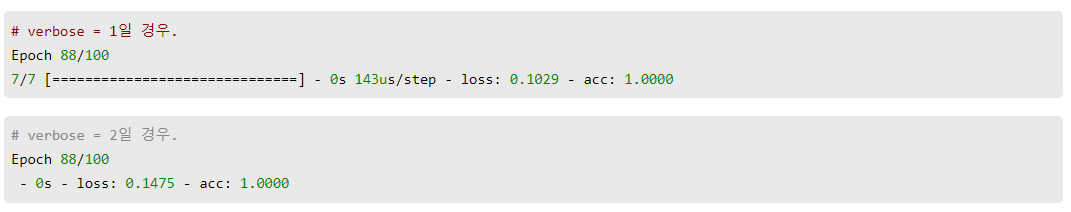

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 0, validation_data(X_val, y_val))

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 0, validation_split = 0.2)

## Evaluation과 Prediction

**evaluate()**: 테스트 데이터를 통해 학습한 모델에 대한 정확도 평가

In [ ]:
model.evaluate(X_test, y_test, batch_size= 32)

**predict()**: 임의의 입력에 대한 모델의 출력값 확인

In [ ]:
model.predict(X_input, batch_size= 32)

## 모델의 저장(Save)과 로드(Load)
학습이 끝난 신경망의 구조를 보존하고 계속 사용할 수 있게 함

**save()**: 인공신경망 모델을 hdf5 파일에 저장

In [8]:
model.save('model_name.h5')

**load_model()**: 저장해둔 모델 불러오기

In [9]:
from tensorflow.keras.models import load_model
model = load_model('model_name.h5')